In [4]:
pip install pycrypto            #python Cryptography Toolkit

     |████████████████████████████████| 450kB 3.4MB/s 
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp36-cp36m-linux_x86_64.whl size=499939 sha256=ab0ba38bc22a257826cdef7117bf82a0575e2124f62708670c3d5212795a3607
  Stored in directory: /root/.cache/pip/wheels/27/02/5e/77a69d0c16bb63c6ed32f5386f33a2809c94bd5414a2f6c196
Successfully built pycrypto


In [5]:
from Crypto import Random
from Crypto.Cipher import AES
import os
import os.path
from os import listdir
from os.path import isfile, join
import time
import hashlib

class Encryptor:
    def __init__(self, key):   # key is used as an argument which is used to encrypt and decrypt data 
        self.key = key         # init method - similar to constructor

    def pad(self, s):
        return s + b"\0" * (AES.block_size - len(s) % AES.block_size)  # padding the message to make it a multiple of the block size of a cipher

    def encrypt(self, message, key, key_size=256):
        message = self.pad(message)
        iv = Random.new().read(AES.block_size)            # generating initialization vector
        cipher = AES.new(key, AES.MODE_CBC, iv)           # AES Block cipher mode - creates a new cipher 
        return iv + cipher.encrypt(message)

    def encrypt_file(self, file_name):
        with open(file_name,"rb") as f:
          bytes = f.read()                              
          readable_hash = hashlib.sha256(bytes).hexdigest();          # generating hash value for the file
        with open(file_name, 'rb') as fo:
            plaintext = fo.read()                                     # read entire file as bytes
        enc = self.encrypt(plaintext, self.key)
        with open(file_name + ".enc", 'wb') as fo:
            fo.write(enc)                                # write encrypted text back to the file
        os.remove(file_name)                             # removing the non encrypted file after encryption
        return readable_hash

    def decrypt(self, ciphertext, key):
        iv = ciphertext[:AES.block_size]                # extracting the iv added to the cipher text
        cipher = AES.new(key, AES.MODE_CBC, iv)
        plaintext = cipher.decrypt(ciphertext[AES.block_size:])
        return plaintext.rstrip(b"\0")                 # rstrip removes padding from the message

    def decrypt_file(self, file_name):
        with open(file_name, 'rb') as fo:
            ciphertext = fo.read()
           # print("CIPHER TEXT")
           # print(ciphertext)
        dec = self.decrypt(ciphertext, self.key)
        with open(file_name[:-4], 'wb') as fo:
            fo.write(dec)
        os.remove(file_name)
key = b'\xbf\xc0\x85)\x10nc\x94\x02)j\xdf\xcb\xc4\x94\x9d(\x9e[EX\xc8\xd5\xbfI{\xa2$\x05(\xd5\x18'   #secret key has been set | b-bytes 32 bytes(AES 256)

#key = Random.new().read(32)
#key=os.urandom(32)
#key = b'assdassdasedfsgthdohhtegsdthsown' 
#print(len(key))
enc = Encryptor(key)

clear = lambda: os.system('cls')   # clearing the screen - works on terminal 

if os.path.isfile('data.txt.enc'):                          # file for storing password
    while True:
        password = str(input("Enter password: "))
        enc.decrypt_file("data.txt.enc")
        p = ''
        with open("data.txt", "r") as f:
            p = f.readlines()
        if p[0] == password:                    #checking if the password matches so that further processing can be done
            enc.encrypt_file("data.txt")
            break

    while True:
        clear()
        choice = int(input(
            "1. Press '1' to encrypt file.\n2. Press '2' to decrypt file.\n3. Press '3' to check if the integrity was maintained \n4. Prees '4' to exit\n"))
        clear()
        if choice == 1:
            p=enc.encrypt_file(str(input("Enter name of file to encrypt: ")))
        elif choice == 2:
            enc.decrypt_file(str(input("Enter name of file to decrypt: ")))
        elif choice == 3:
          filename = input("Enter the input file name: ")
          with open(filename,"rb") as f:
            bytes = f.read() # read entire file as bytes
            readable_hash2 = hashlib.sha256(bytes).hexdigest();
            print("Hash value at reciever end : "+readable_hash2)
            print("Hash value at senders end : "+p)
            if(readable_hash2==p):                                # comparing hash values 
              print("Integrity was maintained")
            else:
              print("*WARNING* file was modified")  
        elif choice == 4:
          exit()      
        else:
            print("Please select a valid option!")

else:
    while True:
        clear()
        password = str(input("Setting up the security. Enter password that will be used for encryption and decryption: "))    #set the password to start the process
        repassword = str(input("Confirm password: "))
        if password == repassword:
            break
        else:
            print("Passwords Mismatched!")
    f = open("data.txt", "w+")
    f.write(password)
    f.close()
    enc.encrypt_file("data.txt")
    
    print("Please restart the program to complete the setup")
    time.sleep(2)
      

Setting up the security. Enter password that will be used for encryption and decryption: shubhi
Confirm password: shubhi
Please restart the program to complete the setup


In [0]:
import datetime as dt
import matplotlib.pyplot as plt

Enter the input file name: azurekey.txt
Time taken by AES
0.000571
Enter the input file name: attractive-beauty-blonde-blur-354951 (1).jpg
Time taken by AES
0.030259
Enter the input file name: Teri Yaari - Millind Gaba.mp3
Time taken by AES
0.098576


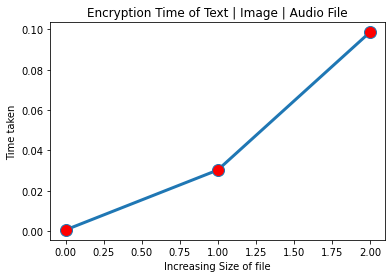

In [9]:
ar = []
for i in range (1,4):  
  filename = input("Enter the input file name: ")
  t_start = dt.datetime.now()
  enc.encrypt_file(filename)
  t_end = dt.datetime.now()
  time = t_end - t_start
  print("Time taken by AES")
  print(time.total_seconds())
  ar.append(time.total_seconds())

plt.plot(ar, label="Time Taken By AES",linewidth=3,marker='o', markerfacecolor='red', markersize=12)
plt.ylabel('Time taken')
plt.xlabel('Increasing Size of file')
plt.title("Encryption Time of Text | Image | Audio File")
plt.show()